In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from pandas.plotting import radviz, parallel_coordinates
import matplotlib.pyplot as plt
from sklearn import metrics
import Orange
import matplotlib
from sklearn.neighbors.nearest_centroid import NearestCentroid

C:\Users\tvlon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#file="biolab.si/lung.tab"
#file="biolab.si/braintumor.tab"
file="biolab.si/leukemia.tab" # run
#file="biolab.si/MLL.tab" # run
#file="biolab.si/lungGSE1987.tab"
#file="biolab.si/SRBCT.tab"
#file="biolab.si/prostata.tab"

In [3]:
data=Orange.data.Table(file)
x=data.X
y=data.Y

In [4]:
att=data.domain.attributes
gene_name=[data.domain.attributes[i].name for i in range(len(att)) ]
gene_name[:5]

['AFFX-BioC-5_at',
 'hum_alu_at',
 'AFFX-DapX-M_at',
 'AFFX-LysX-5_at',
 'AFFX-HUMISGF3A/M97935_MA_at']

In [5]:
gene=data.domain.class_var.values
gene_class=[data.domain.class_var.values[np.int(i)] for i in y]
np.unique(gene_class)

array(['ALL', 'AML'], dtype='<U3')

In [6]:
x=pd.DataFrame(x)
x=(x-x.min())/(x.max()-x.min())

In [7]:
x.shape

(72, 5147)

# Binary Coordinate Descent

In [7]:
col=x.columns.values
p=len(col)
subset=np.zeros(p,dtype=bool)
m=4
sub=col[subset]
select=col[range(m)]


X=x[select].values
score=metrics.silhouette_score(X, y) 


In [18]:
clf = NearestCentroid()

In [19]:
def Fitness(x,y,subset):
    col=x.columns.values
    sub=col[subset]
    m=len(sub)
    if m==0:
        score=-1.0
    else:
        X=x[sub].values#.reshape(1,-1)
        #score=metrics.silhouette_score(X,y)
        clf.fit(X,y)
        score=clf.score(X,y)
    return score

In [46]:
sil=np.zeros(p)

for i in range(p):
    sub=col[i]
    X=np.array([x[sub].values,x[sub].values]).T
    
    
    score=metrics.silhouette_score(X,y)
    sil[i]=score
    

In [48]:
sil[:5]


array([ 0.0882082 ,  0.03018167, -0.06331655, -0.04602942,  0.07699009])

In [49]:
np.argmax(sil)

1673

>>> import heapq
>>> import numpy
>>> a = numpy.array([1, 3, 2, 4, 5])
>>> heapq.nlargest(3, range(len(a)), a.take)
[4, 3, 1]


In [50]:
import heapq

In [60]:
subset=heapq.nlargest(3,range(len(sil)),sil.take)

In [61]:
sil[subset]

array([ 0.64713495,  0.63246229,  0.60518113])

In [20]:
# Optimization
col=x.columns.values
p=len(x.columns.values) # number of attributes
subset=np.zeros(p,dtype=bool) # initial vectors
tol=1E-10
stop=0
F_opt=Fitness(x,y,subset)

while stop==0:
    F_best=F_opt
    best=subset.copy()
    for i in range(p):
        sub_opt=subset.copy()
        sub_opt[i]=not sub_opt[i] # new candidate
        F_new=Fitness(x,y,sub_opt)
        if (F_opt<F_new):
            F_opt=F_new
            subset=sub_opt.copy()
    best=sub_opt
    print(F_opt,col[best])
    if F_best==F_opt:
        stop=1
    #print('optimal: ', F_best,col[best])

0.986111111111 [   0    1    2    5   16   17   18   20   24   27   45   74   75   79   80
   82   87   88  123  158  523  571 1882 5146]
0.986111111111 [   0    1    2    5   16   17   18   20   24   27   45   74   75   79   80
   82   87   88  123  158  523  571 1882 5146]


In [21]:
subset=col[best]

In [22]:
subset

array([   0,    1,    2,    5,   16,   17,   18,   20,   24,   27,   45,
         74,   75,   79,   80,   82,   87,   88,  123,  158,  523,  571,
       1882, 5146], dtype=int64)

In [12]:
def cradviz(x,alpha):
    #alpha
    m=len(x)
    #theta=np.zeros(m)
    #for i in range(m):
    #    theta[i]=alpha[i]#*x[i]+alpha[i,1]*(1-x[i])
    
    anchor=np.array([np.cos(alpha),np.sin(alpha)])
    if np.sum(x)!=0.0:
        p=np.dot(anchor,x)/np.sum(x)
    else:
        p=np.zeros(2)
    return p

In [13]:
def circleradviz(X,a):
	#p=sum 
	(n,m)=X.shape
	Y=np.zeros((n,2))
	for i in range(n):
		Y[i]=cradviz(X[i],a)
	return Y

In [14]:
def DimensionAnchor(m):
    an=np.zeros(m)
    for i in range(m):
        an[i]=i*np.pi*2/m
    return an

In [24]:
#subset=[1292, 1335, 1374, 1673, 5146]
m=len(subset)
anchor=DimensionAnchor(m)
select=subset

In [89]:
#select=[1292, 1335, 1374, 1673, 5146]

Score:  0.198178652554


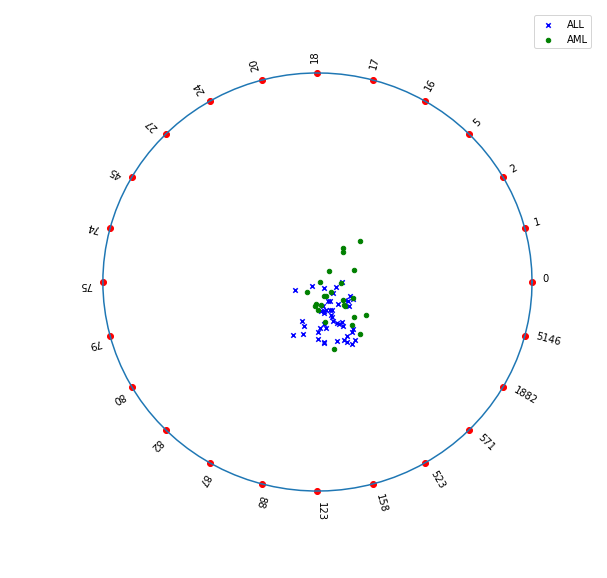

In [25]:
#select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    #plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.axis('off')
#plt.savefig(file[10:][:-3]+'png')
plt.show()

In [93]:
str(m)+file[10:][:-3]+'png'

'5leukemia.png'

In [9]:
from sklearn import random_projection as RP

In [ ]:
random_projection.